In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
nltk.download("stopwords")
nltk.download("wordnet")

C:\Users\BALA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BALA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
!pip install matplotlib

# Load dataset

In [7]:
df=pd.read_csv("complaints.csv")


###### To display first 5 rows of consumer complaint dataset

In [8]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-05-09,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Spring Oaks Capital, LLC",GA,30168,NaN,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13439124
1,2025-05-11,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Resurgent Capital Services L.P.,MD,21075,NaN,NaN,Web,2025-05-22,Closed with non-monetary relief,Yes,NaN,13447616
2,2025-05-10,Prepaid card,General-purpose prepaid card,Trouble using the card,Trouble using the card to spend money in a sto...,NaN,NaN,Incomm Holdings Inc.,CA,94123,Servicemember,NaN,Web,2025-05-22,Closed with explanation,Yes,NaN,13445015
3,2025-05-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"Maximus Federal Services, Inc.",MD,20706,NaN,NaN,Web,2025-05-20,Closed with explanation,Yes,NaN,13441202
4,2025-05-10,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",PA,15237,NaN,Consent not provided,Web,2025-05-22,Closed with explanation,Yes,NaN,13446558


###### To Retrieve last 5 Rows

In [9]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9358713,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
9358714,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
9358715,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118
9358716,2014-11-10,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",CA,95616,NaN,NaN,Postal mail,2014-11-25,Closed with explanation,Yes,No,1110751
9358717,2022-08-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MS,39042,NaN,Consent not provided,Web,2022-08-19,Closed with explanation,Yes,NaN,5891594


# Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358718 entries, 0 to 9358717
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [11]:
df['Product'].value_counts()

Product
Credit reporting or other personal consumer reports                             4609768
Credit reporting, credit repair services, or other personal consumer reports    2163858
Debt collection                                                                  786089
Mortgage                                                                         421188
Checking or savings account                                                      288005
Credit card                                                                      222474
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               143585
Credit reporting                                                                 140429
Student loan                                                                     108820
Bank account or service                                                           86205
Vehicle loan or lease   

In [12]:
target_products = [
    "Credit reporting, credit repair services, or other personal consumer reports",
    "Debt collection",
    "Consumer Loan",
    "Mortgage"
]

In [13]:
df = df[df['Product'].isin(target_products)]
df = df[['Product', 'Consumer complaint narrative']].dropna()

In [14]:
df = df.rename(columns={"Consumer complaint narrative": "complaint", "Product": "category"})
df.reset_index(drop=True, inplace=True)

In [15]:
df.head()

,category,complaint
0,Debt collection,I've complained about procollect and this fals...
1,Debt collection,I am writing to file a formal complaint regard...
2,Debt collection,There are collection accounts on my report tha...
3,Debt collection,"Complaint, QWR, DVR and demand for TILA disclo..."
4,Debt collection,This is about a timeshare. XXXX Vacations turn...


In [16]:
label_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}

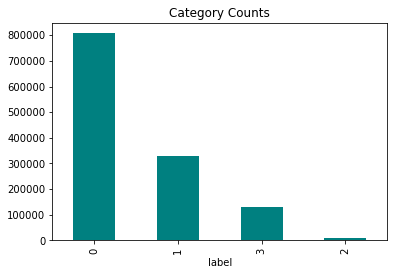

In [17]:
df['label'] = df['category'].map(label_map)
df['label'].value_counts().plot(kind='bar', color='teal')
plt.title("Category Counts")
plt.show()

# Pre Processing

In [18]:
import string
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['cleaned_complaint'] = df['complaint'].apply(clean_text)
df[['complaint', 'cleaned_complaint']].head()

,complaint,cleaned_complaint
0,I've complained about procollect and this fals...,complained procollect false debt continuing ha...
1,I am writing to file a formal complaint regard...,writing file formal complaint regarding severa...
2,There are collection accounts on my report tha...,collection account report believe contain inac...
3,"Complaint, QWR, DVR and demand for TILA disclo...",complaint qwr dvr demand tila disclosure provi...
4,This is about a timeshare. XXXX Vacations turn...,timeshare xxxx vacation turned account xxxx xx...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_complaint']) 
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("naive bayes accuracy:", accuracy_score(y_test, y_pred_nb))
print("naive bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))

naive bayes accuracy: 0.8600147987487619
naive bayes F1 Score: 0.8549655193187247


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression Accuracy: 0.8916089528514997
Logistic Regression F1 Score: 0.8894412629698166


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

Decision Tree Accuracy: 0.8973679368273518
Decision Tree F1 Score: 0.8963152117857667


# Model Performance

In [ ]:
results = pd.DataFrame({
    'Model': ['naive bayes', 'logistic regression', 'decision tree'],
    'accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ]
})
results.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Comparison of model performance')
plt.ylabel("score")
plt.ylim(0,1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()